## Image processing Tools

Aim of these first part is to dicover some tools taht transform an image to a new one that is easier to analyse.

The first class is the so called **pixel processing tools** where you simply modify each pixel of the image, to change its value using some pre-determined functions.


Each grayscale image can be defines as a function
$$f:R^2 \rightarrow R^+$$
where each value $f(x,y)$ is the intensity of the image.

Each color image is a function: 
$$f:R^2 \rightarrow R^{3+}3$$
where ecah value is a three dimensiponal vector containing the image intensity in the red,green and blue channels, respectively.


The simplest pixel transformation can be described by means of  a function 
$\mathcal T$:

$$g(x,y)=\mathcal T(f(x,y))$$
where $g(x,y)$ is the new image obtained after the transformation.
On every pixel, the transformation is independent of the other pixels.

Minimo assoluto: 0
Massimo assoluto: 229


<function matplotlib.pyplot.show(close=None, block=None)>

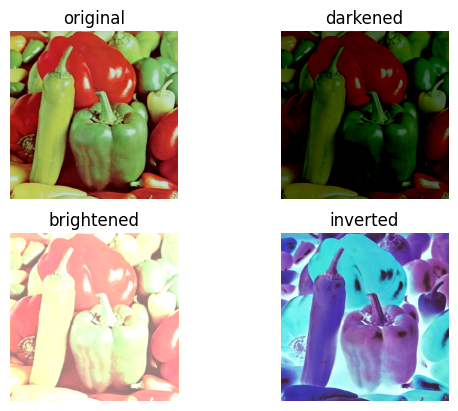

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("peppers1.tif",cv2.IMREAD_COLOR)

# Converti da BGR (standard OpenCV) a RGB (standard Matplotlib/FFT)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2=img_rgb.astype(np.float32)/255.0

min_val = np.min(img_rgb)
max_val = np.max(img_rgb)

print(f"Minimo assoluto: {min_val}")
print(f"Massimo assoluto: {max_val}")

plt.figure()

plt.subplot(221)
plt.imshow(img2)
plt.title("original")
plt.axis('off')

plt.subplot(222)
img_d = np.clip(img2 - 0.5, 0, 1)
plt.imshow(img_d)
plt.title("darkened")
plt.axis('off')

plt.subplot(223)
img_b = np.clip(img2 + 0.5, 0, 1)
plt.imshow(img_b)
plt.title("brightened")
plt.axis('off')

plt.subplot(224)
plt.imshow(1-img2)
plt.title("inverted")
plt.axis('off')

plt.show



## Histogram of an image

An image histogram is a graph that shows how the pixel intensities are distributed in an image. It tells you how many pixels have each brightness value.

For a standard 8-bit grayscale image:
Pixel values range from 0 to 255
- 0 → black
- 255 → white
The histogram:
- X-axis → intensity values (0–255)
- Y-axis → number of pixels at each intensity
So if many pixels are dark, the graph will be higher on the left.
If many pixels are bright, it will be higher on the right.

<p align="center">
  <img src="immagini_sorgente/pixproc1.png"  width="800">
</p>

<p align="center">
  <img src="immagini_sorgente/pixproc2.png"  width="800">
</p>



What about color images?

- One histogram for Red
- One for Green
- One for Blue
Each channel has values from 0–255.

Image histograms are used for:

-  Contrast adjustment
-  Image enhancement
-  Histogram equalization
-  Computer vision preprocessing
- Thresholding (e.g., segmentation)
....

Mathematically:

f an image  has L possible intensity levels (usually 256), the histogram is:
$$ h(r_k)=n_k, \ \ k=1, \ldots L$$
where:
- $r_k$ is an intensity value
- $n_k$ is the number of pixels with that intensity


*Example of histogram equalization.*

Histogram equalization means to redistribute the pixel intensity values so that they use the available dynamic range more effectively (typically 0–255 for 8-bit images).
In simple terms:
we transform the image so its histogram becomes more uniformly distributed, which usually increases contrast.

<class 'numpy.ndarray'>


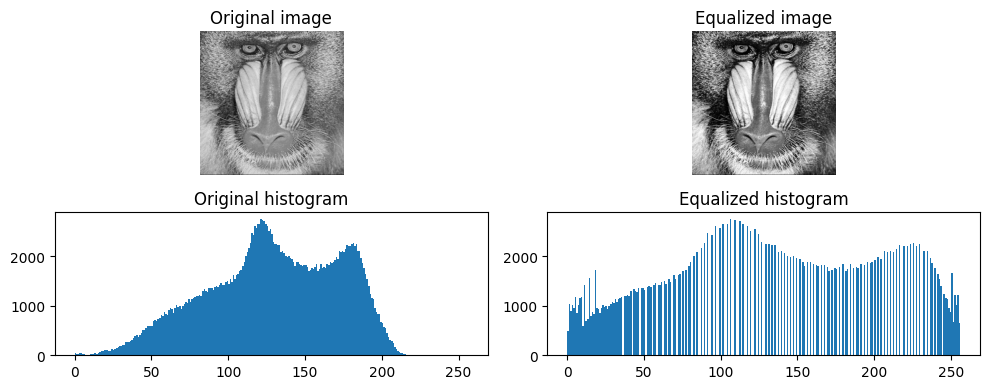

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
img = plt.imread("Baboon.bmp")
#img = cv2.imread('Baboon.bmp', cv2.IMREAD_GRAYSCALE)
print(type(img))

# Apply histogram equalization
img_eq = cv2.equalizeHist(img)

# Plot images and histograms
plt.figure(figsize=(10, 4))


plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(img_eq, cmap="gray")
plt.title("Equalized image")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.hist(img.ravel(), bins=256, range=(0, 256))
plt.title("Original histogram")

plt.subplot(2, 2, 4)
plt.hist(img_eq.ravel(), bins=256, range=(0, 256))
plt.title("Equalized histogram")

plt.tight_layout()
plt.show()


## Image noise

Digital images always are affected by errors (noise). Noise in images is any unwanted random variation in pixel values that does not correspond to the true scene.
Noise reduces contrast, hides details, and can mislead segmentation or measurements.
It can come from different sources such as:
- sensor electronics
- photon statistics
- transmission errors
...

Hence it originates during the acquisition and/or transmission (digitiazation) of the image.
The noise can be correlated or uncorrelated with pixel values. In the first case the value of the noise (random values) that affects a pixel value is *independent* from the value of the pixel, whereas in the second case the value of the noise is proportional to the values of the pixel.

**We have only statistical information about the noise**

Examples of statistical distributions of *uncorrrelated noise*:

- Gaussian noise with zero mean, also called *white noise*. It is an additive noise:

$$ x_n=x+\epsilon $$ 
where $\epsilon \simeq \mathcal N(0,\sigma)$.
Origin: Electronic sensor noise, Thermal noise, Amplifier circuits.

<p align="center">
  <img src="immagini_sorgente/pixproc4.png"  width="300">
   <p align="center"> Gaussian noise
</p>

- uniform noise

- exponential noise 

- impulse noise, also called *salt and pepper noise*: random pixels are set equal to 0 (salt) or 1 (pepper).

<p align="center">
  <img src="immagini_sorgente/pixproc5.png"  width="600">
   <p align="center"> Gaussian noise
</p>
<p align="center">
  <img src="immagini_sorgente\pixproc6.png"  width="600">
   <p align="center"> Gaussian noise
</p>


Examples of statistical distributions of *corrrelated noise*:

- Poisson noise: the variance depends on the intensity of the pixel

-speckle noise (this is not a probabiblity distribution): it is a multiplicative noise:
$$ x_n=x+x*\epsilon$$

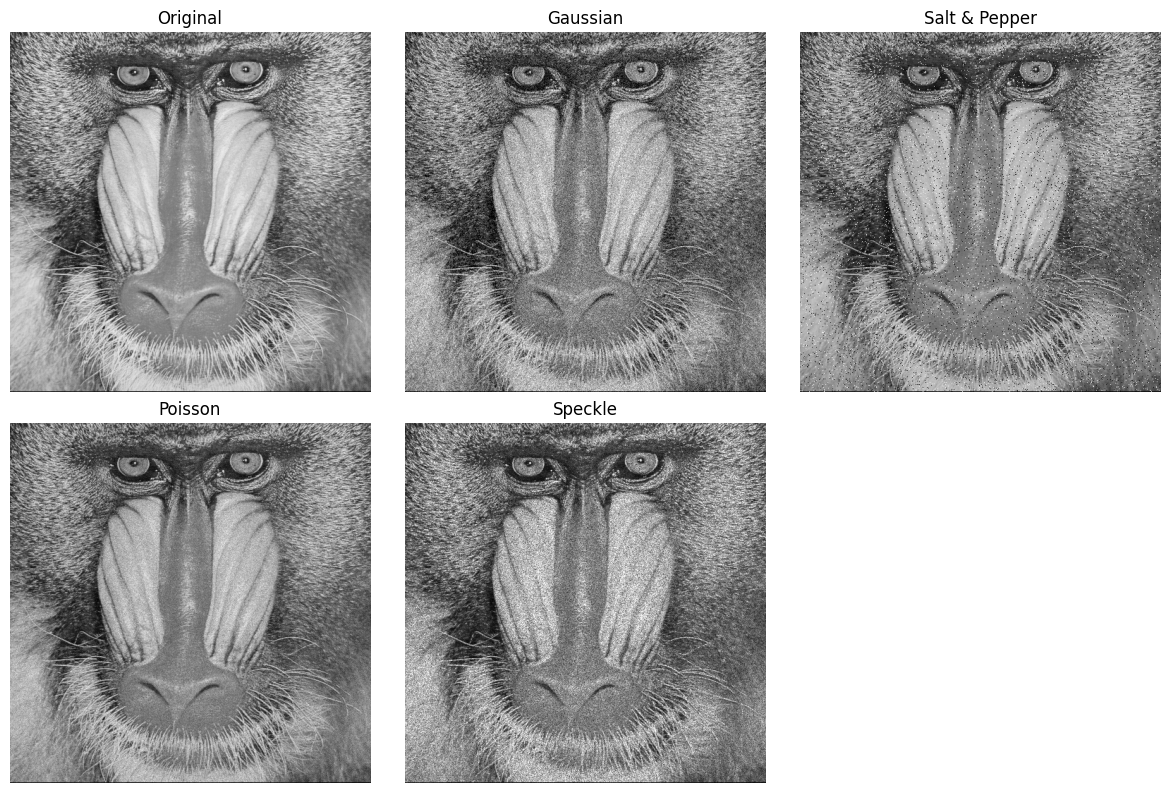

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread("Baboon.bmp", cv2.IMREAD_GRAYSCALE)

img = img.astype(np.float32) / 255.0  # normalize to [0,1]

# Gaussian white noise 
def add_gaussian_noise(image, sigma=0.1):
    noise = np.random.normal(0, sigma, image.shape)
    noisy = image + noise
    return np.clip(noisy, 0, 1)

gaussian_img = add_gaussian_noise(img, sigma=0.1)

# Salt and pepper noise 
def add_salt_pepper_noise(image, amount=0.05):
    noisy = image.copy()
    num_pixels = image.size
    num_salt = int(amount * num_pixels / 2)
    num_pepper = int(amount * num_pixels / 2)

    # Salt
    coords = np.random.randint(0, image.shape[0], num_salt), \
             np.random.randint(0, image.shape[1], num_salt)
    noisy[coords] = 1

    #   Pepper
    coords = np.random.randint(0, image.shape[0], num_pepper), \
             np.random.randint(0, image.shape[1], num_pepper)
    noisy[coords] = 0

    return noisy

sp_img = add_salt_pepper_noise(img, amount=0.05)

# Poisson noise 
def add_poisson_noise(image):
    noisy = np.random.poisson(image * 255) / 255
    return np.clip(noisy, 0, 1)

poisson_img = add_poisson_noise(img)

# Speckle noise 

def add_speckle_noise(image, sigma=0.2):
    noise = np.random.normal(0, sigma, image.shape)
    noisy = image + image * noise
    return np.clip(noisy, 0, 1)

speckle_img = add_speckle_noise(img, sigma=0.2)

# Display the results

plt.figure(figsize=(12, 8))

titles = ["Original",
          "Gaussian",
          "Salt & Pepper",
          "Poisson",
          "Speckle"]

images = [img, gaussian_img, sp_img, poisson_img, speckle_img]

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()




Summarizing:

<p align="center">
  <img src="immagini_sorgente\pixproc7.png"  width="700">
</p>

